# Logistic Regression

In [1]:
import  pandas as pd                 
import  matplotlib.pyplot as plt     
import  numpy  as np                 
import  time                         
import  math                         


In [2]:
pddata=pd.read_csv('LogiReg_data.txt',header=None,names=['x1','x2','y'])
pddata

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [3]:
pddata.insert(0,'x0',1)
pddata

,x0,x1,x2,y
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1
...,...,...,...,...
95,1,83.489163,48.380286,1
96,1,42.261701,87.103851,1
97,1,99.315009,68.775409,1
98,1,55.340018,64.931938,1


In [5]:
pdvalues=pddata.values  
pdvalues[0:5]

array([[ 1.        , 34.62365962, 78.02469282,  0.        ],
       [ 1.        , 30.28671077, 43.89499752,  0.        ],
       [ 1.        , 35.84740877, 72.90219803,  0.        ],
       [ 1.        , 60.18259939, 86.3085521 ,  1.        ],
       [ 1.        , 79.03273605, 75.34437644,  1.        ]])

In [6]:
def pltshow(X,Y,points=2,cate=1):
    c1=['b','r','y','g']
    marker1=['x','o','x','o']
    labe1=['one','two','three','four']
    fig, ax = plt.subplots(figsize=(10, 5))  
    if cate==1:
        for i in range(points):
            positive = X[Y == i]  
            ax.scatter(positive[:, 0], positive[:, 1], s=30, c=c1[i], marker=marker1[i], label=labe1[i])
    elif cate==2:
        ax.scatter(X, Y, s=30 )
    else:
        ax.plot(X, Y, c='b', label='pass')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

In [7]:
cols=pdvalues.shape[1] 
X=pdvalues[:,0:cols-1] 
Y=pdvalues[:,cols-1]   
shape=pdvalues.shape
shape

(100, 4)

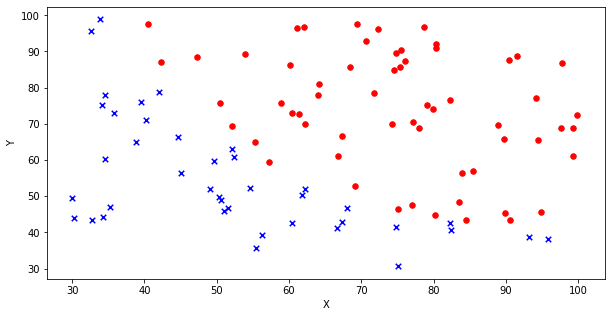

In [8]:
pltshow(pdvalues[:, 1:3],Y,points=2)


In [9]:
def sigmoid(data):
    return  1/(1+np.exp(-data))

In [10]:
def model(X,theta):
    return  sigmoid(np.dot(X,theta.T))  

初始化θ参数

In [11]:
theta=np.zeros(cols-1)
theta

array([0., 0., 0.])

损失函数

In [12]:
def loss(Xc,Yc,theta):
    xlen = Xc.shape[0]
    left=np.multiply((Yc-1),np.log(1-model(Xc,theta))) # multiply 乘法计算  对应位置相乘    
    right=np.multiply(Yc,np.log(model(Xc,theta)))
    cost=np.sum(left-right)/xlen
    return  cost

梯度计算

In [13]:
def gradient(Xn,Yn,theta):# (100  3)  
    xshape0=Xn.shape[0]   # 100
    xshape1=Xn.shape[1]   # 3
    grad=np.zeros(xshape1)# (0,0,0,)
    chazhi=model(Xn, theta)-Yn
    for j in range(xshape1):# 3   
        onegrad=np.multiply(chazhi,Xn[:,j])
        onegrad=np.sum(onegrad,axis=0)/xshape0
        grad[j]=onegrad
    return  grad

打乱数据

In [14]:
def shuffledata(datashuffle):
    np.random.shuffle(datashuffle)
    colsd = datashuffle.shape[1]
    X = datashuffle[:, 0:colsd - 1]
    Y = datashuffle[:, colsd - 1]
    return X,Y

In [15]:

def train(pdvalues,theta,celve=2,xuexilv=0.0001,val=0.02):  # stopcate 1 次数   2

    ticks = time.time()
    X = pdvalues[:, 0:cols - 1]
    Y = pdvalues[:, cols - 1]
    Y1=Y.copy()
    i = 0
    grad=gradient(X,Y,theta)
    costnp = []

    tg=[]
    tg1=[]
    tg1.append(theta[1])
    tg1.append(grad[1])
    tg.append(tg1)

    while True:
        
        theta = theta - xuexilv * grad
        
        grad = gradient(X, Y, theta)
        
        
        i = i + 1
        if i < 15000:
            tg1 = []
            tg1.append(theta[1])
            tg1.append(grad[1])
            tg.append(tg1)

        if i %2000 == 0:
            cost1 = loss(X, Y, theta)
            cost2=[]
            cost2.append(i)
            cost2.append(cost1)
            costnp.append(cost2)

        if celve==1:
            if i>val:
                break
        elif celve==2:
            if np.linalg.norm(grad)<val:
                break
        else:
            pass

    costnp = np.array(costnp)
    tgnp=np.array(tg)

    
    print('loss:', loss(X, Y, theta))

    Y=np.dot(X, theta.T)
    for k,i in enumerate(Y):
        if i >0:
            Y[k]=1
        else:
            Y[k] = 0
#算后散点图1
    
    pltshow(X[:,1:3],Y,points=2)
    shapeY=Y.shape[0]
#正确率
    correct=[]

    for k, i in enumerate(Y):
        if i == Y1[k]:
            correct.append(1)
        else:
            if i==0:
                Y[k]=3
            else:
                Y[k]=2
    accuracy=len(correct)/shapeY
    
#     print(X[0:20])
#     print(Y[0:20])
#     exit()
    

    pltshow(X[:,1:3], Y, points=4)#算后散点图2包含错误点
    pltshow(costnp[:,0], costnp[:,1], '', cate=3)     #损失图
    pltshow(tgnp[:, 0], tgnp[:, 1], '', cate=3)       #梯度线图
    pltshow(tgnp[:, 0], tgnp[:, 1], points=1, cate=2)#梯度散点图

    print('范数',np.linalg.norm(grad))
    print('theta:', theta)
    print('grad:',grad)
    print('准确率:', accuracy)
    ticks1 = time.time()
    yunxingshijian=ticks1 - ticks
    print('运行时间:',yunxingshijian)

原图


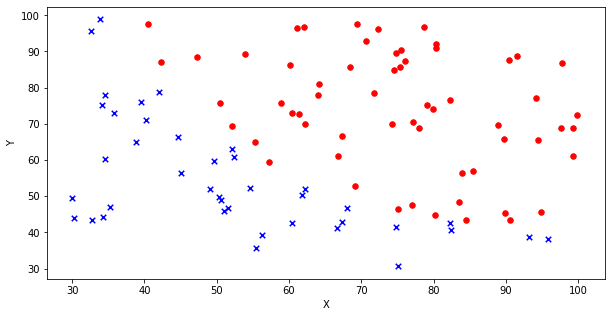

训练后
loss: 0.30971261346273876


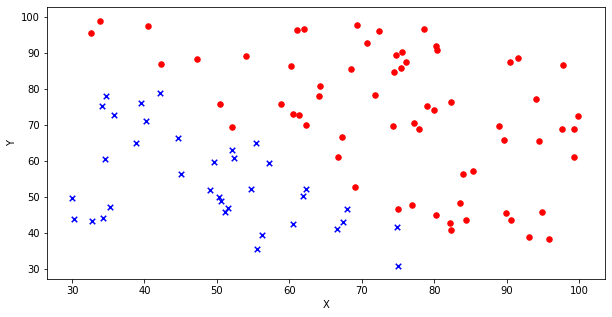

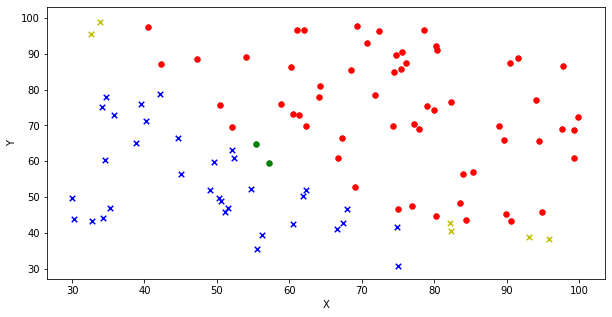

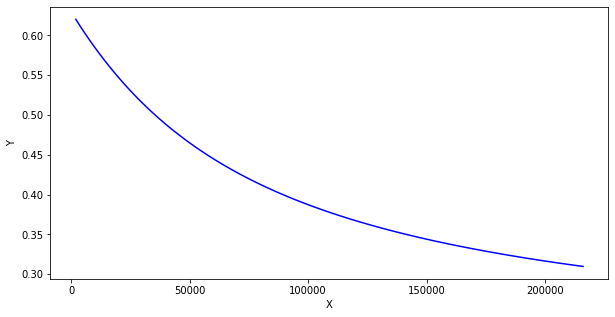

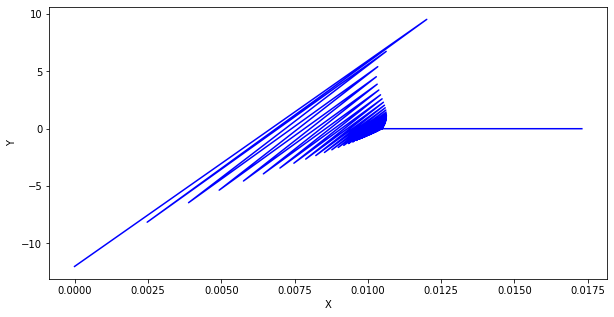

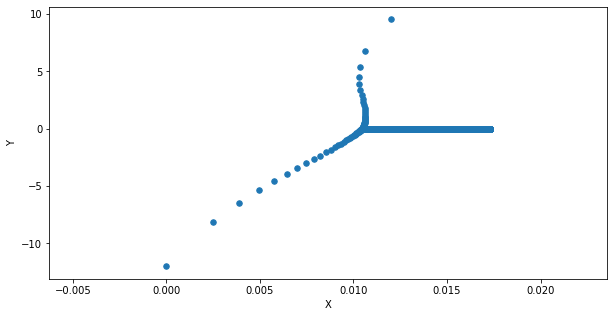

范数 0.019999965293509052
theta: [-7.7825185   0.06808781  0.06161468]
grad: [ 0.01999873 -0.00015568 -0.00015819]
准确率: 0.92
运行时间: 8.044085025787354


In [16]:
print('原图')
pltshow(pdvalues[:, 1:3],Y,points=2)
print('训练后')
train(pdvalues,theta,xuexilv=0.001,val=0.02)      # 10秒
